### REFERÊNCIA CÓDIGO BASE

https://www.youtube.com/watch?v=WOUMZatSiLM

<hr>

### IMPORTAÇÕES

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sympy as symbols
from pandas.api.types import is_numeric_dtype

> <hr>

### DATASET

> Permanece o mesmo por enquanto;

In [22]:
# substituindo 'caminho/do/seu/iris.data' pelo caminho real do seu arquivo Iris.data e 'iris.csv' pelo nome desejado para o arquivo CSV de saída.
input_file = 'C:\\JupyterLab\\PAPL-UFPE\\ML-Fuzzy\\Testes\\iris.data'
output_file = 'iris.csv'

# carregando arquivo no pandas
iris_data = pd.read_csv(input_file, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# salvando em comma separated values (csv)
iris_data.to_csv(output_file, index=False)

In [23]:
# normalização
for index in iris_data.columns: # em suma, para as colunas do DataFrame, vamos analisar se os dados são numéricos
    # se os dados forem numéricos, eles serão normalizados
    if is_numeric_dtype(iris_data[index][0]): # retomando uma função do pandas
        iris_data[index] = iris_data[index]/max(iris_data[index])

In [24]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.645570,0.795455,0.202899,0.08,Iris-setosa
1,0.620253,0.681818,0.202899,0.08,Iris-setosa
2,0.594937,0.727273,0.188406,0.08,Iris-setosa
3,0.582278,0.704545,0.217391,0.08,Iris-setosa
4,0.632911,0.818182,0.202899,0.08,Iris-setosa


**ANALISANDO A DISTRIBUIÇÃO DOS DADOS**

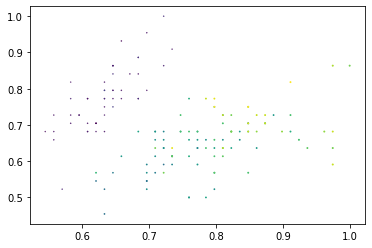

In [25]:
# todos os dados
data=iris_data.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
plt.scatter(data.sepal_length, data.sepal_width, data.petal_length, data.petal_width)

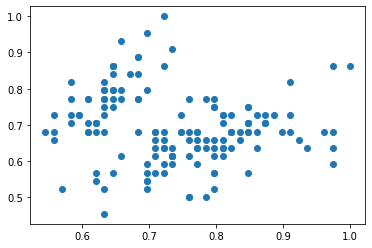

In [26]:
# data only according to sepal
data=iris_data.loc[:,['sepal_length', 'sepal_width']]
plt.scatter(data.sepal_length, data.sepal_width)

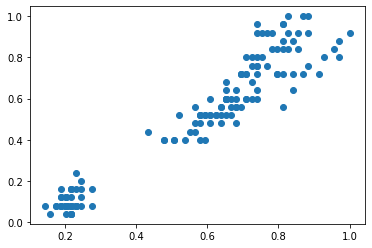

In [27]:
# data accoording only to petal
data=iris_data.loc[:,['petal_length', 'petal_width']]
plt.scatter(data.petal_length, data.petal_width)

> <hr>

### Observações Implementação

In [28]:
# aqui vai entrar só o kernel por enquanto
# deixar largura como constante NESSE doc

# pois um lance que percebi é que deixei o kernel trick com deus, não implementei ele
# daí, como ele parece um boa estretégia principalmente pra dados menos controlados como o do iris, vou tentar colocar aqui
# fiz um notebook só pra isso pq se der problema demais pelo menos não atrapalha o que já tá encaminhado
# vi que tem opções diferentes de implementar ele, daí vamo seguir o esquema do artigo, se possível
    # "In kernel-based clustering algorithms it is possible to compute Euclidean distances by using kernel functions and the so-called distance kernel trick."
    # This trick uses a kernel function to calculate the dot products of vectors implicitly in the higher dimensional space using the original space."
    # artigo prof
# a fórmula implementada aqui é a do artigo mesmo

### FUZZY C-MEANS

In [29]:
iris_data = np.array(iris_data)
iris_data # shoukd be a 2d array

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08,
        'Iris-setosa'],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08, 'Iris-setosa'],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16, 'Iris-setosa'],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12, 'Iris-setosa'],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04,
        'Iris-setosa'],
       [0.68

In [30]:
iris_data_without_last_column = iris_data[:, :-1]
iris_data_without_last_column

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04],
       [0.6835443037974683, 0.8409090909090908, 0.21739130434782608,
        0.08],
       [0.6075949367088607, 0.7727272727272726, 0.2318840579710145, 0.08],
       [0.607594936

**CONDIÇÕES INICIAIS**

> Acho que aqui vai caber definir algumas coisas como funções e não mais como valores fixos

In [31]:
# number of clusters
    # definido como 3 pq conheço o iris dataset
K = 3

# fuzziness value 
m = [1.1, 1.6, 2]
# os valores definidos acima foram indicados pelo professor

# largura
sigma = 1

In [32]:
# vamo juntar tudo aqui de maneira que una o feito às coisas novas

In [33]:
# definir um início randomico p U
U = np.random.rand(iris_data_without_last_column.shape[0], K)
print('Membership inicial (U inicial):')
print(U)

Membership inicial (U inicial):
[[0.56392576 0.89674748 0.45385131]
 [0.41083089 0.84794909 0.55764825]
 [0.88962284 0.93790625 0.9302613 ]
 [0.93562791 0.39261154 0.64689645]
 [0.65001056 0.72447241 0.17673618]
 [0.15237048 0.7484502  0.11959371]
 [0.34594631 0.97371591 0.80102502]
 [0.26045451 0.76492847 0.49539423]
 [0.90452685 0.01903373 0.30238941]
 [0.32051118 0.62041181 0.43420123]
 [0.02231489 0.81627886 0.53443436]
 [0.3772154  0.52052936 0.68694349]
 [0.56978835 0.19516758 0.38819969]
 [0.55091528 0.01045556 0.77221841]
 [0.04211429 0.17101151 0.31532962]
 [0.16734035 0.0359538  0.79578019]
 [0.50079451 0.67446877 0.58026406]
 [0.51836754 0.48765702 0.9967152 ]
 [0.91209087 0.55064212 0.12515482]
 [0.44799086 0.65172015 0.93619554]
 [0.56750488 0.92702045 0.16327395]
 [0.37302898 0.26538503 0.51778216]
 [0.21040314 0.83915583 0.38847797]
 [0.60212777 0.06434358 0.46741343]
 [0.71875172 0.31352372 0.83523719]
 [0.37249649 0.34087246 0.07311132]
 [0.45099386 0.05018466 0.966463

In [34]:
# precisamos de 3 centroides pro caso do iris
def calculando_centroides(iris_data_without_last_column, K, U, m):
    centroides = np.zeros((K, iris_data_without_last_column.shape[1]))
    for i in range(K):
        U_corrigido = np.tile(U[:, i][:, np.newaxis], (1, iris_data_without_last_column.shape[1]))
        m_expandido = np.tile(m[i], (iris_data_without_last_column.shape[0], iris_data_without_last_column.shape[1]))
        centroides[i, :] = np.sum((U_corrigido ** m_expandido) * iris_data_without_last_column, axis=0) / np.sum(U_corrigido ** m_expandido)
    return centroides

centroides = calculando_centroides(iris_data_without_last_column, K, U, m)

In [35]:
def gaussian_kernel(iris_data_without_last_column, centroides, sigma):
    """
    EQUAÇÃO DO KERNEL TRICK
    
    """
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]
    kernel_m = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            distance_squared = np.sum((iris_data_without_last_column[i] - centroides[j]) ** 2)
            kernel_m[i, j] = np.exp(-0.5 * distance_squared / sigma**2) # -0.5 como o -1/2 antes que eu surte e ache que tá errado de novo

    return kernel_m

kernel_m = gaussian_kernel(iris_data_without_last_column, centroides, sigma)

def kg_membership(iris_data_without_last_column, centroides, sigma):
    """
    Calcula a matriz de membership fuzzy entre os dados e os centroides usando o kernel gaussiano.

    Args:
    iris_data_without_last_column (ndarray): Conjunto de dados.
    centroides (ndarray): Matriz de centroides dos clusters.
    sigma (float): parâmetro de largura!!!!! muito importante futuramente (sim preciso escrever isso em todo lugar para quando a ansiedade bater)
   
   Returns:
    ndarray: matriz de MEMBERSHIP fuzzy
        # lembrando que o pertencimento com kernel é calculado com base nas distâncias
        # então aqui meio que substitui a matriz_dg do FCM
    """
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]
    U_novo = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            x = iris_data_without_last_column[i:i+1]  # Seleciona um ponto de dados como um vetor unidimensional
            c = centroides[j:j+1]  # Seleciona um centróide como um vetor unidimensional
            U_novo[i, j] = gaussian_kernel(x, c, sigma)

    return U_novo # novos valores de pertinência agora foram calculados com KERNEL

U_novo =  kg_membership(iris_data_without_last_column, centroides, sigma)

def matriz_dg(iris_data_without_last_column, centroides):
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]

    distancias = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            distancias[i, j] = np.linalg.norm(iris_data_without_last_column[i] - centroides[j])

    return distancias

matriz_dg = matriz_dg(iris_data_without_last_column, centroides)

# mudando a função objetivo pra considerar o kernel
def fobj_kernel(U_novo, kernel_matrix, m):
    # os valores da função vão sendo somados 
    
    c, n = U_novo.shape
    objetivo = 0

    for i in range(c):
        for j in range(n):
            objetivo += U_novo[i, j] ** m * kernel_matrix[i, j]

    return objetivo

N = iris_data_without_last_column.shape[0] # número de dados
velho_obj = fobj_kernel(U_novo, matriz_dg, m)

In [36]:
maximo = 100

# Inicializar valores de pertinência e centroides
U = np.random.rand(iris_data_without_last_column.shape[0], K)
centroides = calculando_centroides(iris_data_without_last_column, K, U, m)

# Calcular matriz de distâncias inicial
J_anterior = matriz_dg

for iteration in range(maximo):
    # Atualizar valores de pertinência e centroides
    U_novo = kg_membership(iris_data_without_last_column, centroides, sigma)
    centroides = calculando_centroides(iris_data_without_last_column, K, U_novo, m)
    
    # Calcular nova matriz de distâncias
    nova_J = matriz_dg
    
    # Calcular função objetivo
    novo_objetivo = fobj_kernel(U_novo, nova_J, m)

    # Verificar convergência
    if (np.all(nova_J <= J_anterior) or 
        np.all(np.abs(novo_objetivo - velho_obj) < 1e-6) or
        iteration == maximo - 1):
        break

    # Atualizar valores para a próxima iteração
    velho_obj = novo_objetivo
    J_anterior = nova_J

    # Atualizar pertinências para a próxima iteração
    U = U_novo

In [37]:
print("Centroides finais:")
print(centroides)
print()
print("Pertinências dos dados aos centroides (U final):")
print(U)

Centroides finais:
[[0.17881358 0.17376422 0.12154216 0.10208321]
 [0.17657583 0.17382458 0.11618221 0.09561638]
 [0.17469769 0.17400692 0.11153407 0.09005401]]

Pertinências dos dados aos centroides (U final):
[[0.76291551 0.2900605  0.91201602]
 [0.88315128 0.0740959  0.88538412]
 [0.19287052 0.64974652 0.09003397]
 [0.98435791 0.59103057 0.25188339]
 [0.5852046  0.1528715  0.32641145]
 [0.04049717 0.8766173  0.37411271]
 [0.0793185  0.19886048 0.17396511]
 [0.16125783 0.89180492 0.43549475]
 [0.26395263 0.17557436 0.21741966]
 [0.76566476 0.30935661 0.5810589 ]
 [0.72233793 0.03027249 0.30691563]
 [0.33470169 0.52676558 0.60655256]
 [0.4836967  0.07426954 0.61314386]
 [0.59747389 0.94223964 0.4411574 ]
 [0.02757012 0.52152345 0.88508184]
 [0.89979675 0.84143808 0.16648202]
 [0.30657215 0.66088852 0.06312542]
 [0.68410693 0.09012293 0.17817974]
 [0.87793424 0.13783708 0.13303261]
 [0.9214493  0.78640301 0.80107547]
 [0.57072465 0.72376347 0.98400069]
 [0.71086983 0.00830097 0.5233246

In [38]:
print("Centroides finais:")
print(centroides)
print()
print("Membership final (U_novo):")
print(U)
print()
print('J final:')
print(nova_J)
print()

Centroides finais:
[[0.17881358 0.17376422 0.12154216 0.10208321]
 [0.17657583 0.17382458 0.11618221 0.09561638]
 [0.17469769 0.17400692 0.11153407 0.09005401]]

Membership final (U_novo):
[[0.76291551 0.2900605  0.91201602]
 [0.88315128 0.0740959  0.88538412]
 [0.19287052 0.64974652 0.09003397]
 [0.98435791 0.59103057 0.25188339]
 [0.5852046  0.1528715  0.32641145]
 [0.04049717 0.8766173  0.37411271]
 [0.0793185  0.19886048 0.17396511]
 [0.16125783 0.89180492 0.43549475]
 [0.26395263 0.17557436 0.21741966]
 [0.76566476 0.30935661 0.5810589 ]
 [0.72233793 0.03027249 0.30691563]
 [0.33470169 0.52676558 0.60655256]
 [0.4836967  0.07426954 0.61314386]
 [0.59747389 0.94223964 0.4411574 ]
 [0.02757012 0.52152345 0.88508184]
 [0.89979675 0.84143808 0.16648202]
 [0.30657215 0.66088852 0.06312542]
 [0.68410693 0.09012293 0.17817974]
 [0.87793424 0.13783708 0.13303261]
 [0.9214493  0.78640301 0.80107547]
 [0.57072465 0.72376347 0.98400069]
 [0.71086983 0.00830097 0.52332465]
 [0.36112754 0.2698

In [39]:
# professor tinha comentado algo também do valor mínimo da função objetivo, mas eu não coloquei essa análise em lugar nenhum
# vomo ver se está dando certo

# aqui ele não vai analisar, vai calcular
# sobre analisar: se diminuir, o valor da objetivo tá menor
# se é o menor possível aí eu não sei

from scipy.optimize import minimize

def objetivo(x):
    return fobj_kernel(U_novo, kernel_m, x)

# Chute inicial para o valor do expoente de pertinência
x0 = 1.0

# Minimiza a função objetivo
resultado = minimize(objetivo, x0)

# Valor mínimo encontrado
valor_minimo = resultado.fun

print("Valor mínimo da função objetivo:", valor_minimo)

Valor mínimo da função objetivo: 6.811831468924354e-05


In [40]:
# 6 tabao ou tinha que ser outra coisa?